In [1]:
import os
import json

from nibabel import Nifti1Image
from nilearn import plotting
from torchio import transforms

import torchio as tio
import torchio as tio
from torch.utils.data import DataLoader

from ai4sipmbda.utils import fetching, difumo_utils

In [2]:
# Number of images to fetch
max_images = 10

In [3]:
# Fetching...
neurovault = fetching.fetch_nv(max_images = max_images)

Load pre-fetched data from Neurovault...
Number of (down)loaded fMRI files: 10


In [4]:
BASE_PATH = '../../Data/neurovault/neurovault/collection_4337/'

IMAGE_PATH = os.path.join(BASE_PATH, 'image_69118.nii.gz')
METADATA_PATH = os.path.join(BASE_PATH, 'image_69118_metadata.json')

In [10]:
# Each instance of tio.Subject is passed arbitrary keyword arguments.
# Typically, these arguments will be instances of tio.Image
x = tio.ScalarImage(IMAGE_PATH)

In [41]:
# Settings for transformations
probs = (0.5, 0.5) # Probabilities of sampling a specific transformation
n_spikes = 5 # Required for RandomSpike

flips = tio.transforms.RandomFlip(flip_probability=1.0)
spikes = tio.transforms.RandomSpike(n_spikes)

# Transform the image
one_of_transform = tio.transforms.OneOf({
    flips: probs[0],
    spikes: probs[1]
})

# x_trans = one_of_transform(x)
x_trans = flips(x)

print(f"Starting shape: {x.shape}")
print(f"Final shape: {x_trans.shape}")

Starting shape: (1, 91, 109, 91)
Final shape: (1, 91, 109, 91)


In [40]:
def show_aug_effect(img_tio, aug_name, plot_diff=False, **kwargs):
    transform = getattr(transforms, aug_name)(**kwargs)
        transformed_img_tio = transform(img_tio)
    img_nii = Nifti1Image(
        img_tio.data.squeeze().numpy(),
        affine=img_tio.affine,
    )
    if plot_diff:
        transformed_img_nii = Nifti1Image(
            (transformed_img_tio.data - img_tio.data).squeeze().numpy(),
            affine=img_tio.affine,
        )
    else:
        transformed_img_nii = Nifti1Image(
            transformed_img_tio.data.squeeze().numpy(),
            affine=img_tio.affine,
        )
    plotting.plot_glass_brain(img_nii)
    plotting.plot_glass_brain(transformed_img_nii)

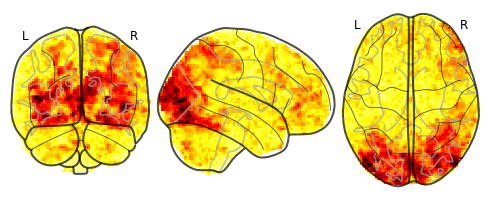

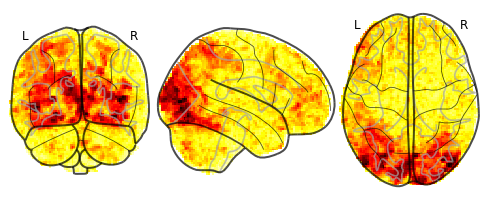

In [41]:
show_aug_effect(x, "RandomFlip", flip_probability=1.)

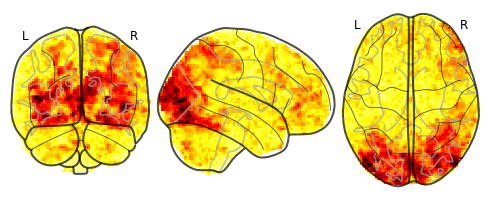

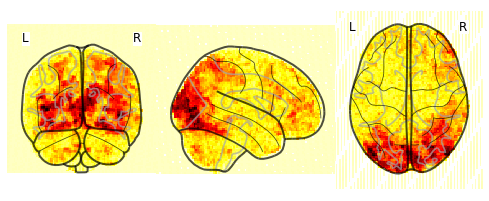

In [42]:
show_aug_effect(x, "RandomSpike", num_spikes=3)

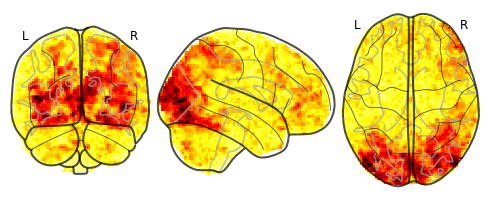

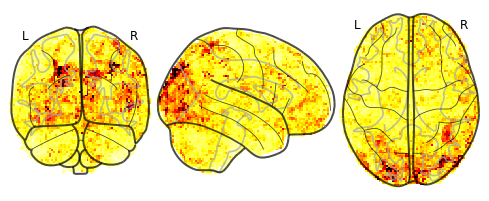

In [43]:
show_aug_effect(x, "RandomElasticDeformation", plot_diff=True, num_control_points=15, max_displacement=1.5,)

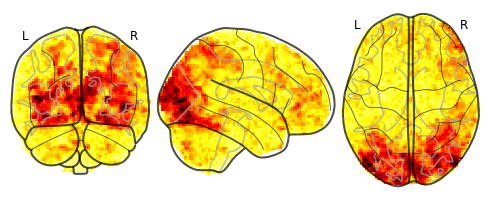

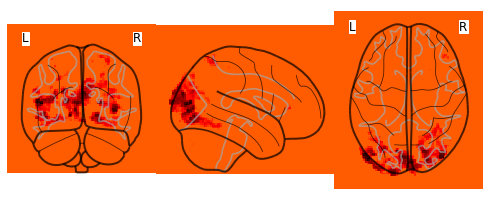

In [44]:
show_aug_effect(x, "RandomAffine", scales=0., degrees=0., translation=10)

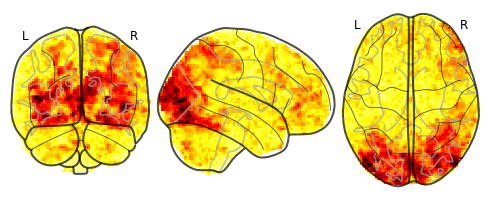

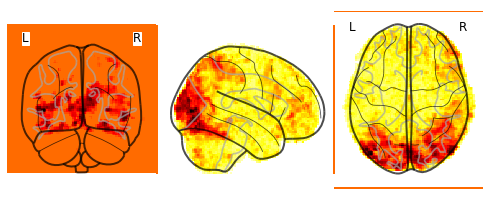

In [45]:
show_aug_effect(x, "RandomAffine", scales=0.1, degrees=0., translation=0.)

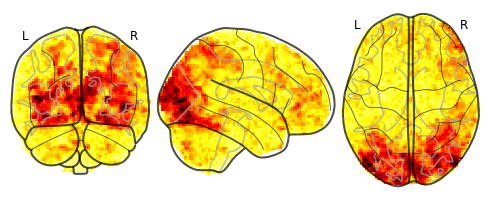

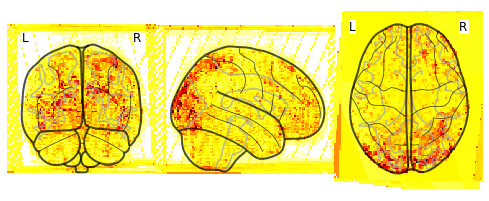

In [47]:
show_aug_effect(x, "RandomMotion", plot_diff=True)

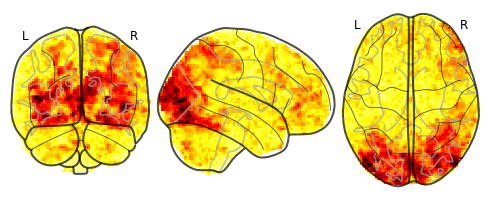

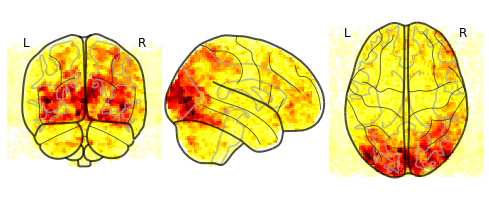

In [51]:
show_aug_effect(x, "RandomGhosting")

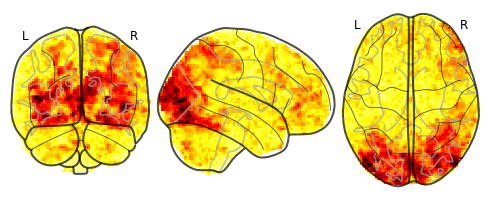

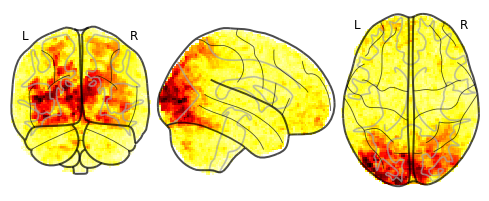

In [52]:
show_aug_effect(x, "RandomBiasField")

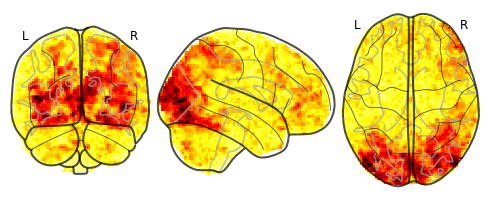

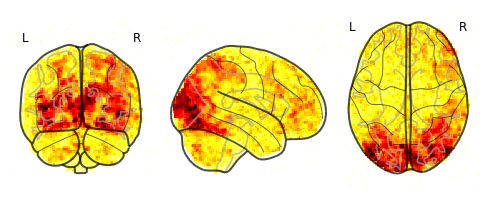

In [56]:
show_aug_effect(x, "RandomNoise")

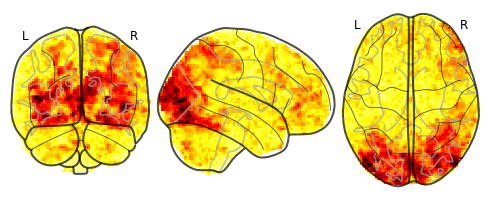

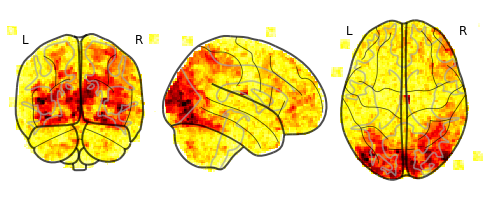

In [59]:
show_aug_effect(x, "RandomSwap", patch_size=6, num_iterations=10)

In [60]:
from miccai2020expe.task import do_classif
from miccai2020expe.task_loading import load_reduced_hcp

In [5]:
with open(METADATA_PATH, "r") as f:
    metadata = json.load(f)

In [6]:
metadata

{'url': 'https://neurovault.org/images/69118/',
 'id': 69118,
 'file': 'https://neurovault.org/media/images/4337/z_FACES.nii.gz',
 'collection': 'https://neurovault.org/collections/4337/',
 'collection_id': 4337,
 'file_size': 1854169,
 'cognitive_paradigm_cogatlas': 'emotion processing fMRI task paradigm',
 'cognitive_paradigm_cogatlas_id': 'trm_550b5b066d37b',
 'cognitive_contrast_cogatlas': None,
 'cognitive_contrast_cogatlas_id': None,
 'map_type': 'Z map',
 'analysis_level': 'single-subject',
 'name': '100206_EMOTION_FACES',
 'description': None,
 'add_date': '2018-10-08T13:56:05.932467Z',
 'modify_date': '2018-10-13T08:14:02.807815Z',
 'is_valid': False,
 'surface_left_file': 'https://neurovault.org/media/images/4337/69118.L.func.gii',
 'surface_right_file': 'https://neurovault.org/media/images/4337/69118.R.func.gii',
 'data_origin': 'volume',
 'target_template_image': 'MNI152NLin2009cAsym',
 'subject_species': 'homo sapiens',
 'figure': None,
 'handedness': None,
 'age': None,
 

In [7]:
metadata["contrast_definition"]

'FACES'

In [ ]:
f = None
do_classif(
    X_t,
    Y_t,
    f,
    method_name="Original",
    filename="../results/%s_%s.csv" % (study, "Original"),
    train_size=train_size,
    n_splits=10,
    n_jobs=10,
)

In [ ]:
# Get DiFuMo map
dimension = 1024
difumo_map = difumo_utils.get_DiFuMo_map(dimension)

# Get mask
maps_data, mask = difumo_utils.get_mask(neurovault, difumo_map, save=False)

# Compute projector
Z = difumo_utils.get_projector_from_mask(maps_data, mask, save=False)